In [1]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import numpy as np

n=10
def random_particules(n):
    X=[]
    Y=[]
    poids_particules={}
    for i in range(n):
        x,y = np.random.random(),np.random.random()
        X.append(x)
        Y.append(y)
        poids_particules[(x,y)] = 0
    return X,Y,poids_particules
X,Y,poids_particules=random_particules(n)

In [2]:
def update_particules(X,Y,v,poids_particules):
    Xnew=[]
    Ynew=[]
    for i in range(len(X)):
        x = X[i]+(np.random.random()-0.5)*v*2
        Xnew.append(x)
        y = Y[i]+(np.random.random()-0.5)*v*2
        Ynew.append(y)
        poids_particules[(x,y)] = poids_particules[(X[i],Y[i])]
        del poids_particules[(X[i],Y[i])]
    return Xnew,Ynew,poids_particules

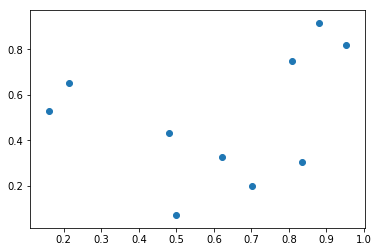

In [3]:
X,Y,poids_particules=random_particules(n)
Xnew,Ynew,poids_particules=update_particules(X,Y,0.05,poids_particules)
plt.figure()
plt.scatter(Xnew,Ynew)

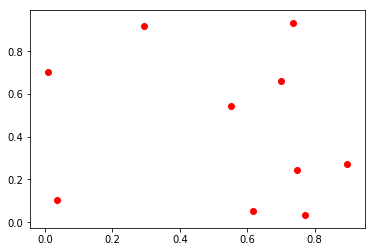

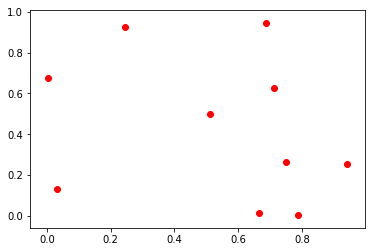

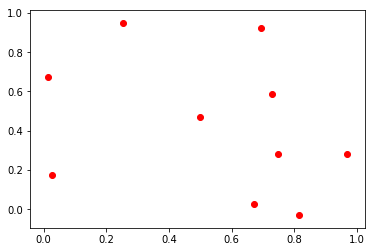

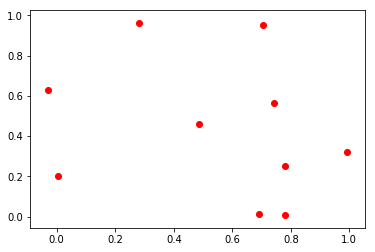

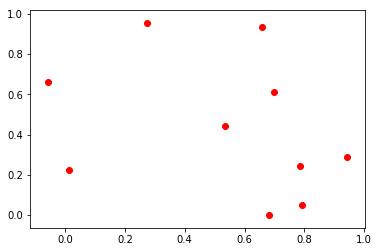

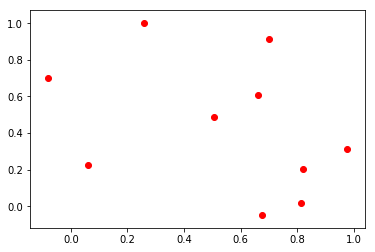

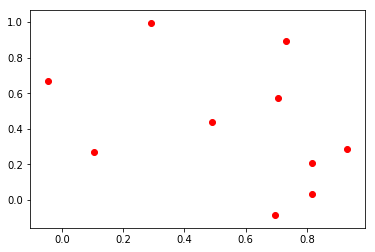

In [4]:
t=6
plt.figure()
X,Y,poids_particules=random_particules(10)
plt.scatter(X,Y,c="red")
#plt.savefig("0.png")
plt.show()
for i in range(t):
    X,Y,poids_particules=update_particules(X,Y,0.05,poids_particules)
    plt.scatter(X,Y,c="red")
    #plt.savefig(str(i+1)+".png")
    plt.show()

In [36]:
def fusion_v2(X,Y,poids_particules):
    for x0,y0 in zip(X,Y):
        for x1,y1 in zip(X,Y):
            if x0 != x1 and y0 != y1:
                if np.around(x0,decimals=1) == np.around(x1,decimals=1) and np.around(y0,decimals=1) == np.around(y1,decimals=1):
                    X.remove(x1)
                    Y.remove(y1)
                    poids_particules[(x0,y0)] = poids_particules[(x0,y0)] + 1
    return X,Y,poids_particules
                    
                    
                    
                
                    

In [29]:
X

[0.6305086131505567,
 0.7707055104782718,
 0.012932357234768644,
 0.2031965225759018,
 0.9976323055023851,
 0.3752260657620885,
 0.5812006143801197]

In [30]:
Y

[0.5833408298539927,
 0.6728187615771349,
 0.35678312317039623,
 0.18296932961783433,
 -0.06702383596220893,
 0.6505218571084758,
 1.2308001676925846]

In [31]:
fusion_v2(X,Y,poids_particules)

([0.6305086131505567,
  0.7707055104782718,
  0.012932357234768644,
  0.2031965225759018,
  0.9976323055023851,
  0.3752260657620885,
  0.5812006143801197],
 [0.5833408298539927,
  0.6728187615771349,
  0.35678312317039623,
  0.18296932961783433,
  -0.06702383596220893,
  0.6505218571084758,
  1.2308001676925846],
 {(0.012932357234768644, 0.35678312317039623): 0,
  (0.2031965225759018, 0.18296932961783433): 0,
  (0.3752260657620885, 0.6505218571084758): 0,
  (0.5206138384287233, 0.8432688732235508): 0,
  (0.5812006143801197, 1.2308001676925846): 0,
  (0.6305086131505567, 0.5833408298539927): 1,
  (0.7707055104782718, 0.6728187615771349): 1,
  (0.8036871539573267, 0.8159009141417011): 0,
  (0.8057628542619966, 0.8315549561363154): 1,
  (0.9976323055023851, -0.06702383596220893): 0})

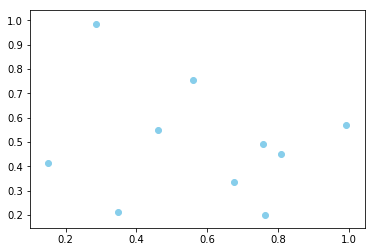

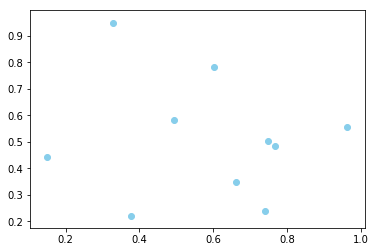

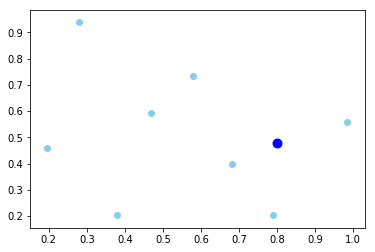

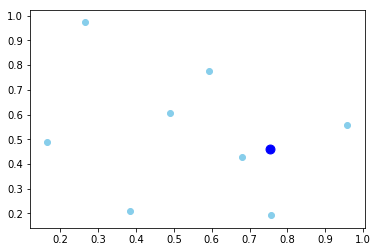

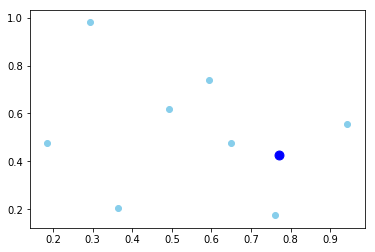

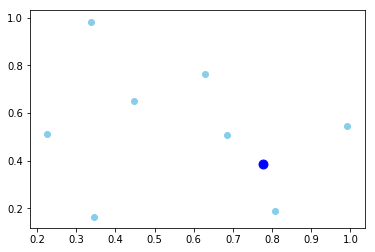

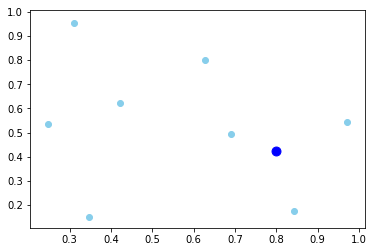

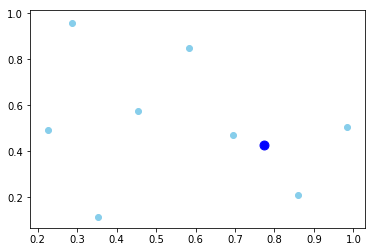

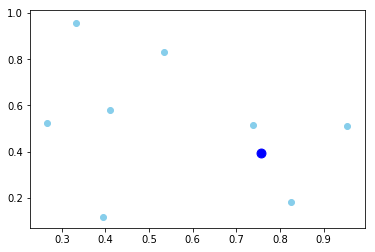

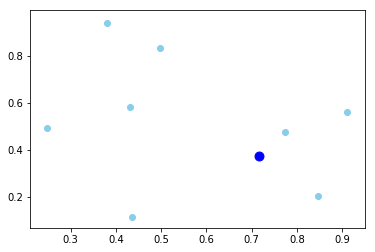

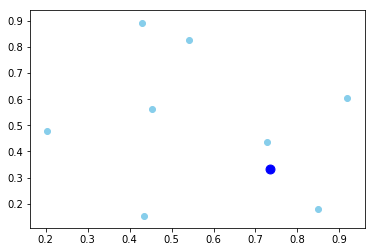

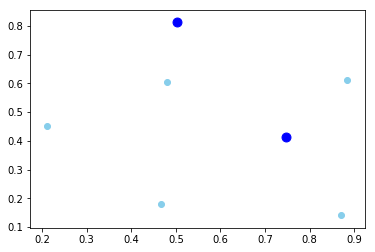

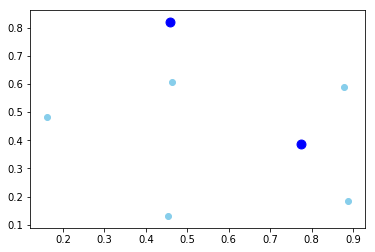

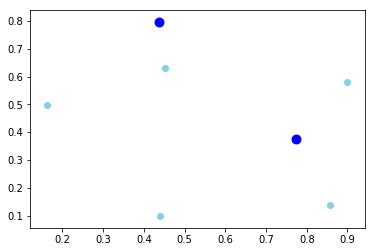

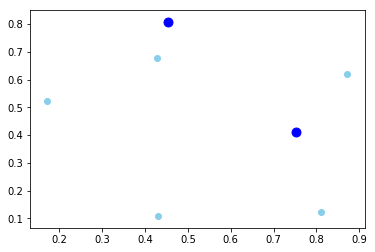

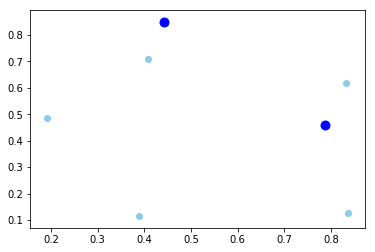

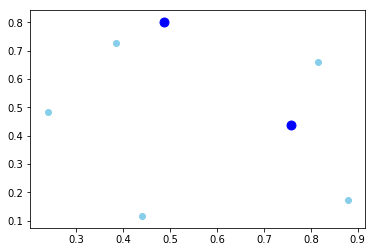

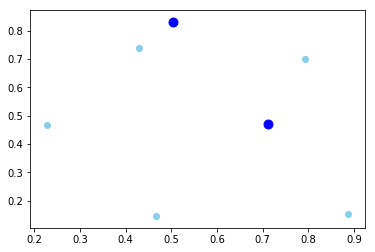

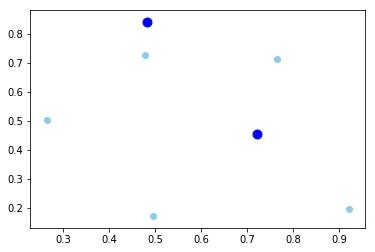

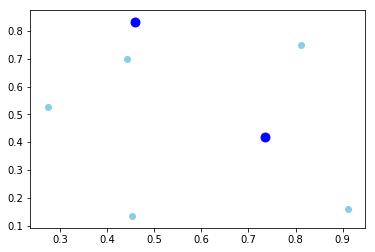

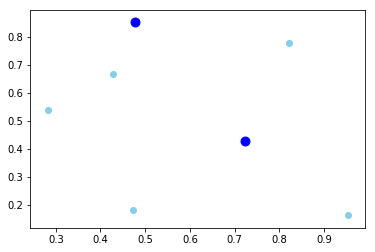

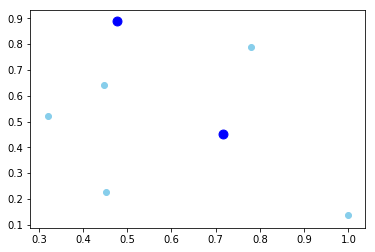

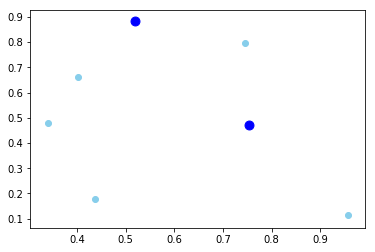

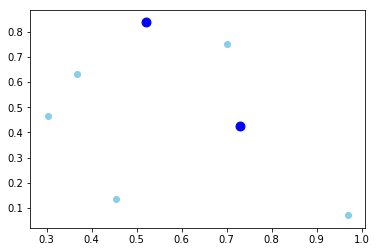

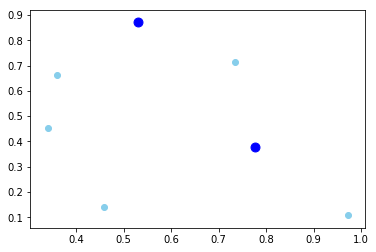

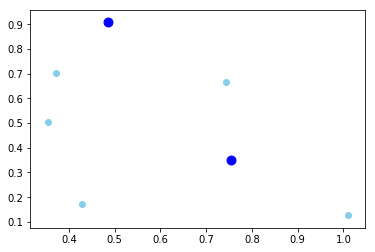

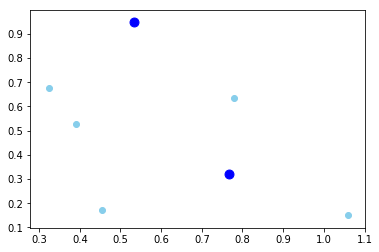

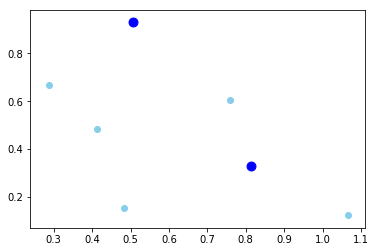

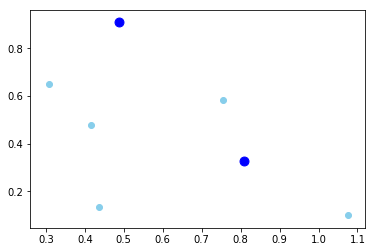

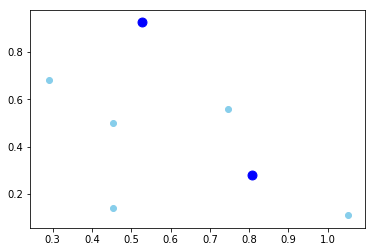

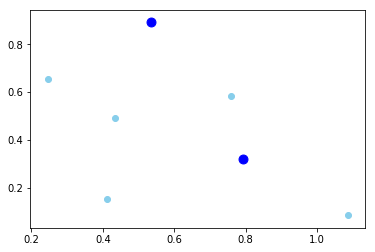

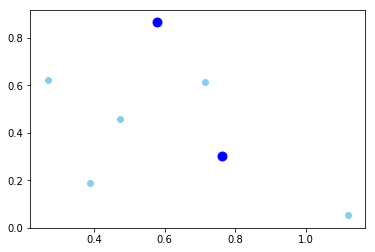

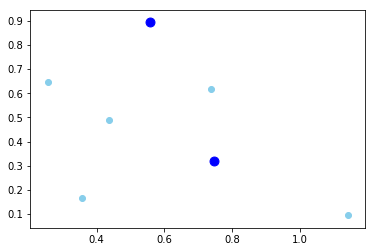

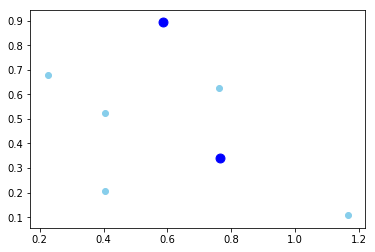

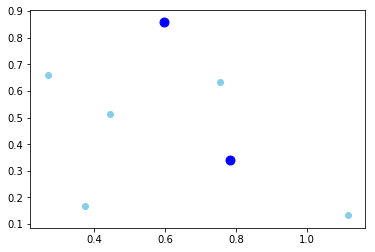

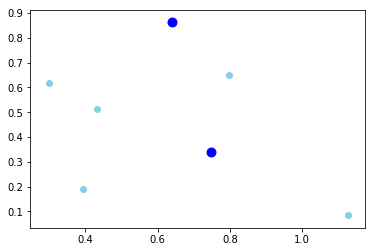

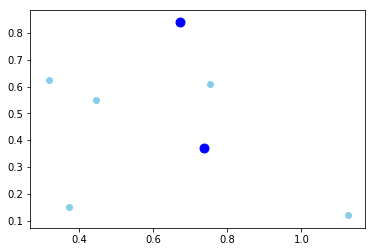

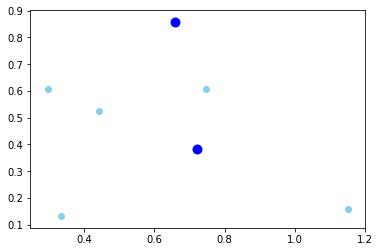

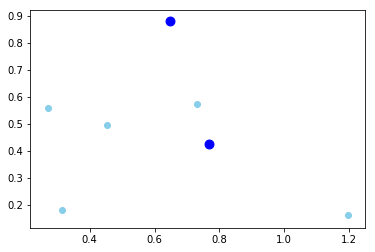

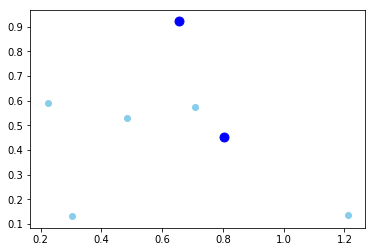

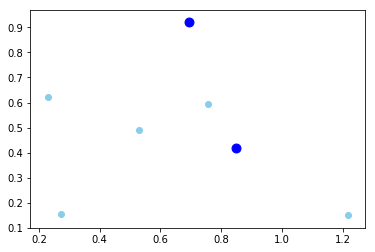

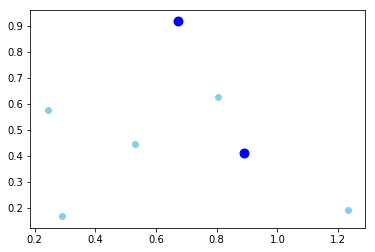

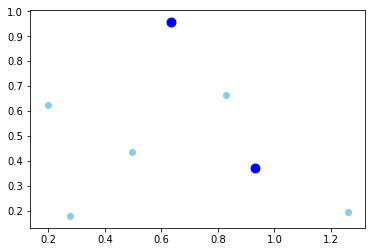

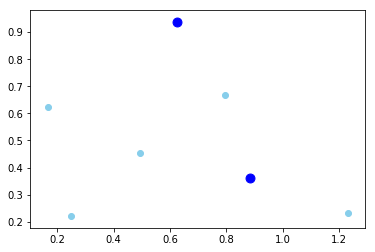

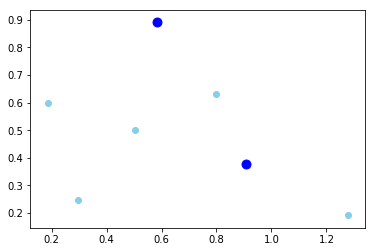

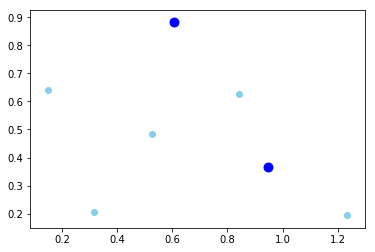

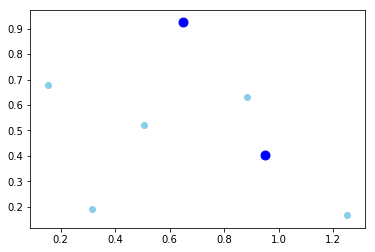

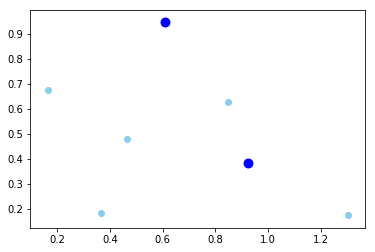

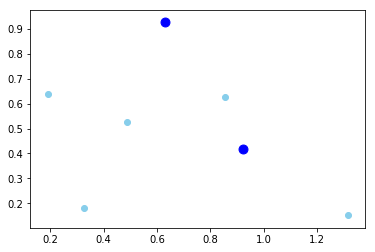

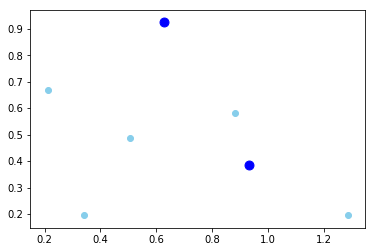

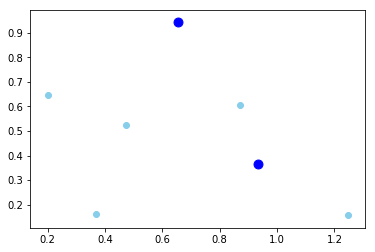

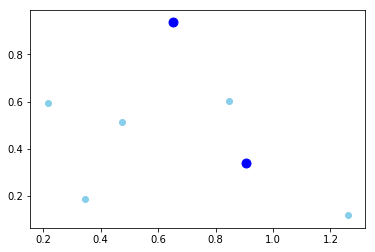

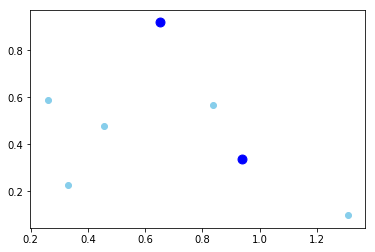

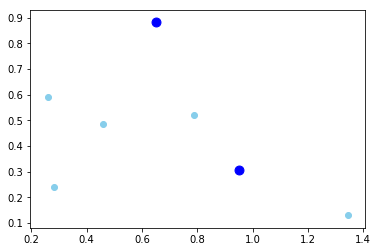

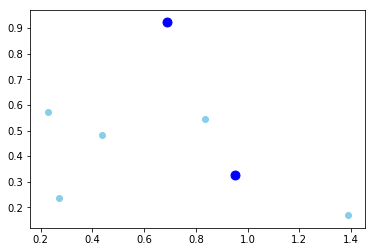

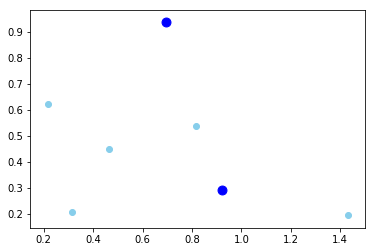

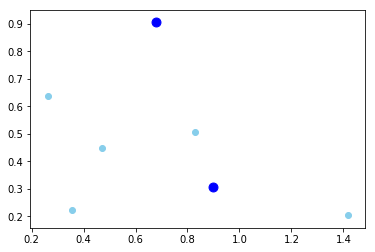

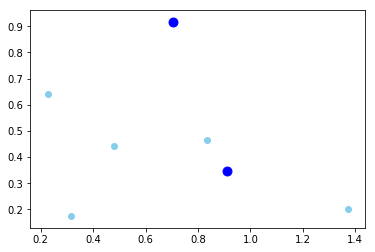

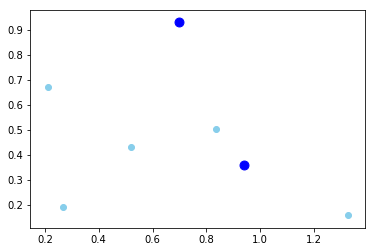

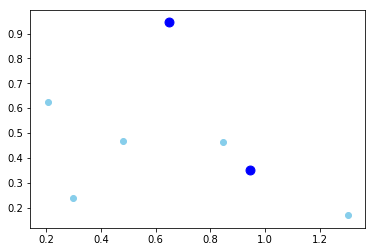

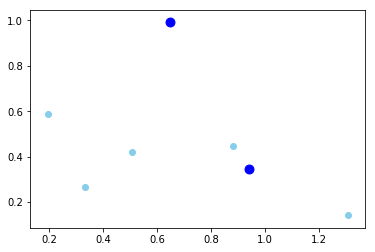

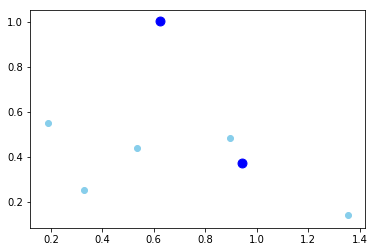

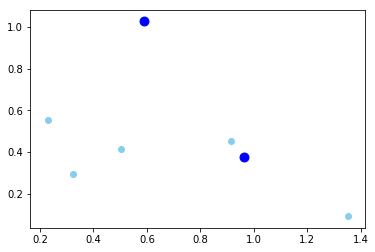

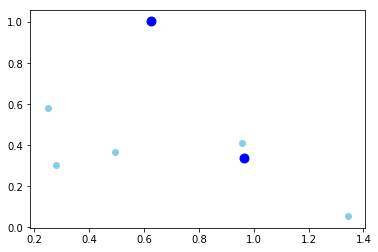

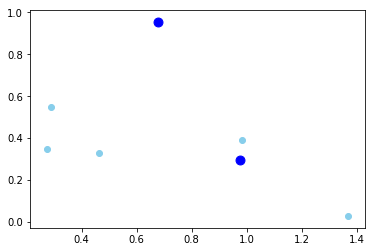

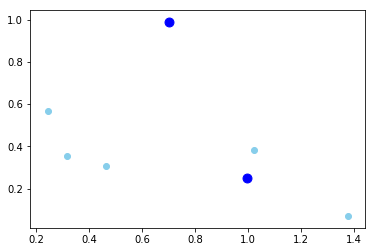

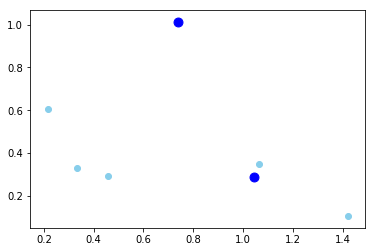

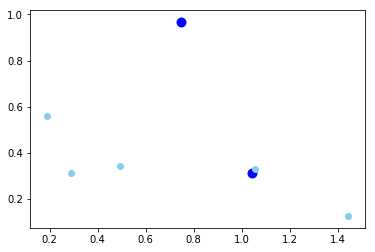

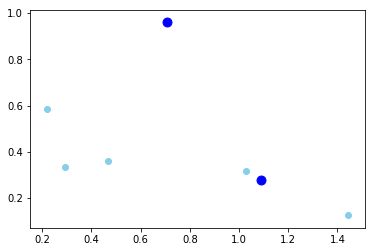

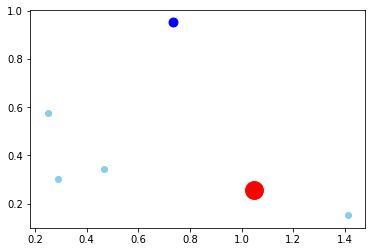

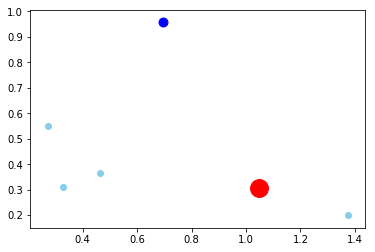

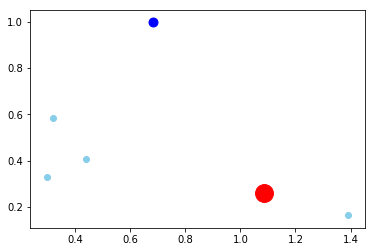

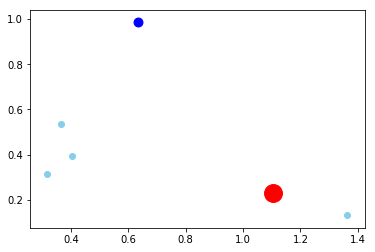

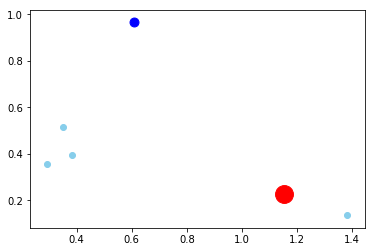

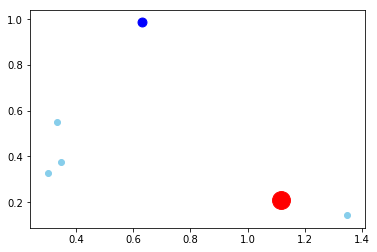

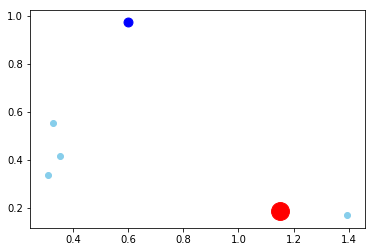

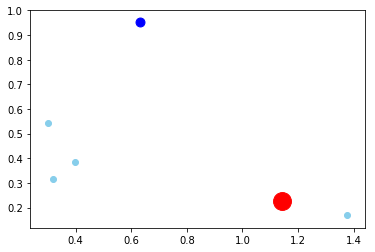

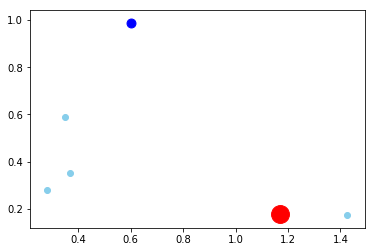

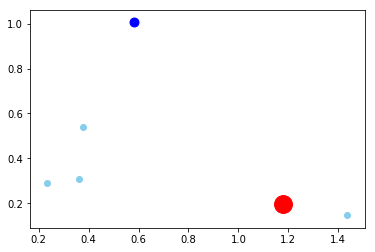

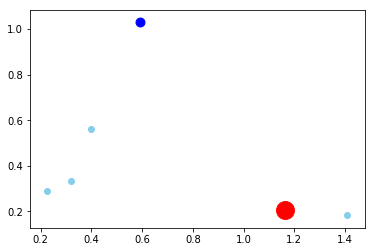

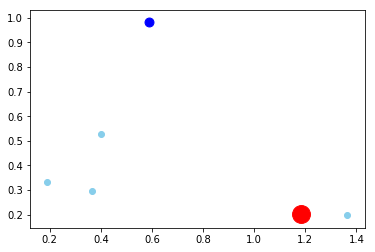

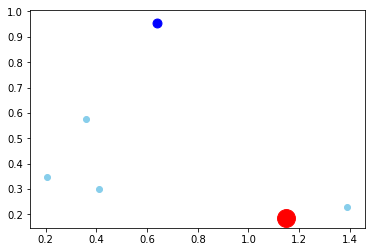

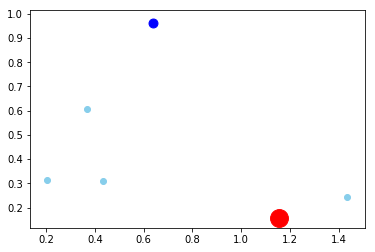

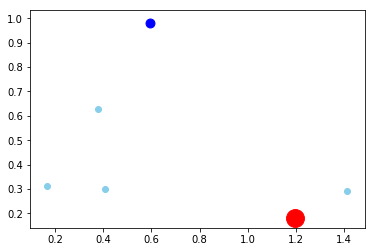

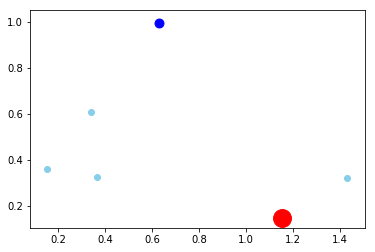

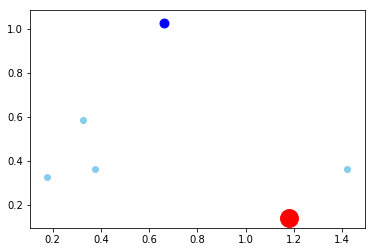

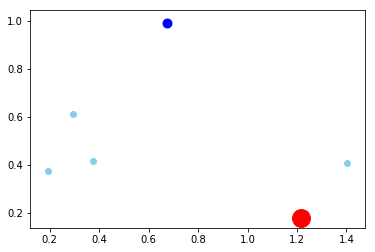

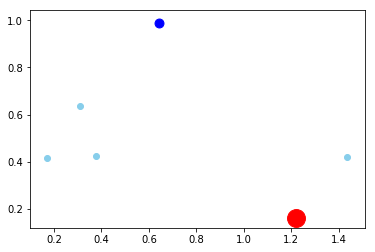

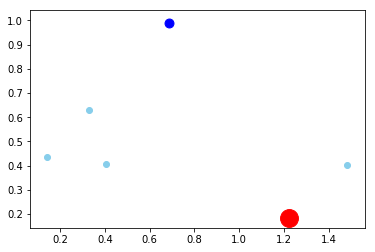

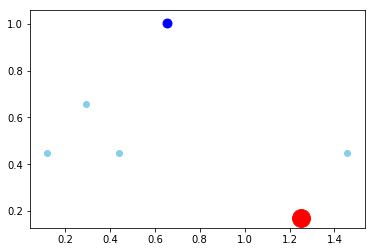

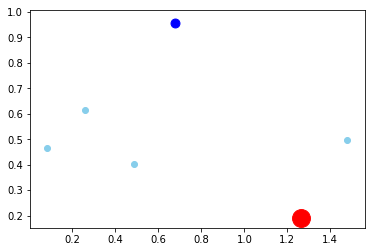

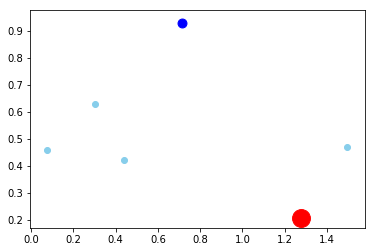

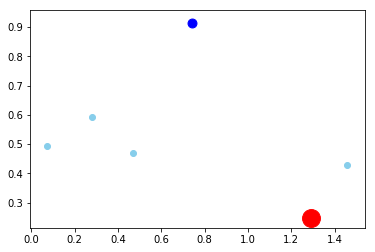

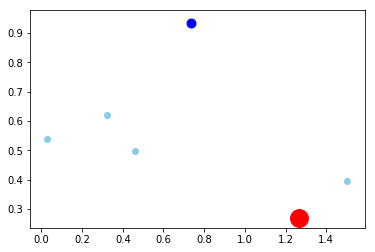

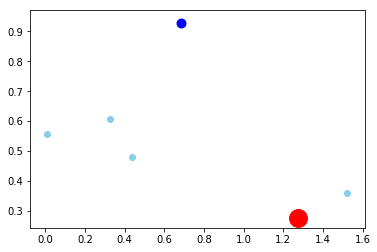

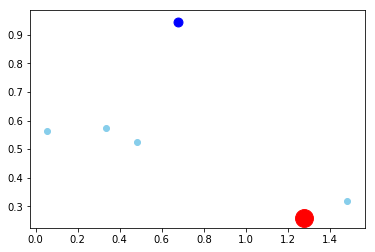

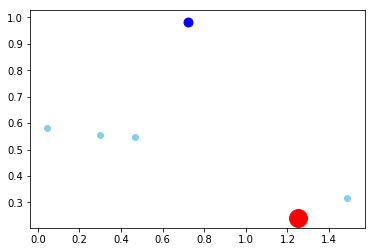

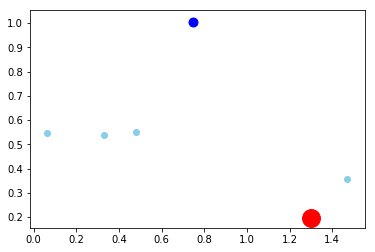

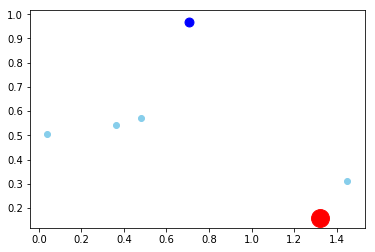

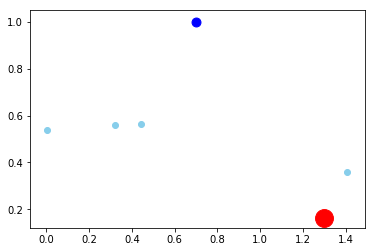

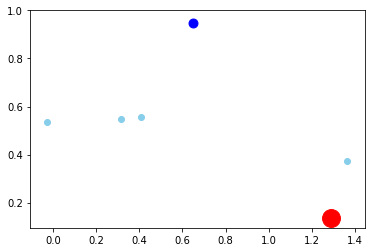

In [47]:
t=100
plt.figure()
X,Y,poids_particules=random_particules(10)
plt.scatter(X,Y,c="skyblue")
#plt.savefig("0.png")
plt.show()

            
for i in range(t):
    X,Y,poids_particules=update_particules(X,Y,0.05,poids_particules)
    
    
    fusion_v2(X,Y,poids_particules)
    for x0,y0 in zip(X,Y):
        if poids_particules[(x0,y0)] == 0:
            plt.scatter(x0,y0,c="skyblue")
        elif poids_particules[(x0,y0)] == 1:
            plt.scatter(x0,y0,c="blue",s=80)
        elif poids_particules[(x0,y0)] == 2:
            plt.scatter(x0,y0,c="red",s=320)
        elif poids_particules[(x0,y0)] == 3:
            plt.scatter(x0,y0,c="red",s=800)
    
    #plt.savefig(str(i+1)+".png")
    plt.show()